# DATA 512 FINAL PROJECT

A successful report will take the form of a well-written, well-executed research study document (plus supplementary resources, see the full requirements below) contained in a folder within your Github repository—the same folder that holds your final project plan (Assignment 5).

Your previous deliverables for the final project proposal and plan (assignments 4 and 5) are part of this report: you are expected to build your report by adding more text (and, obviously, code!) to your existing project plan Jupyter Notebook.

Structure of the report
The report should be structured well, with headings and even sub-headings. Most reports should have a structure similar to this one

Introduction
Background or Related Work
Research questions or hypotheses
Methodology
Findings
Discussion (including Limitations and Implications)
Conclusion
References

## Introduction / Motivation

start with some sort of “introduction” or “motivation” section that describes what the study is about, why it is important/interesting, and note any existing research in this area and/or other related work, like articles by journalists.

Contain a description of their dataset and the license or terms of use (unless these are described in the README)

## Background or Related Work

## Research questions or hypotheses

Contain explicit research questions or hypotheses

## Methodology

Describe the methods they used, and explain why these methods are good/appropriate methods to use


## Findings

In [1]:
import pandas as pd
import numpy as np
import os

# import libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# magic code for viewing plots using jupyter notebooks:
%matplotlib inline

In [2]:
# set the base directory
os.chdir('/home/jovyan/data-512/data-512-final/data-512-final')

# read the data
df_inv = pd.read_csv('raw_data/NFCS_2018_Investor_Data_191107.csv')
df_sbs = pd.read_csv('raw_data/NFCS_2018_State_Data_190603.csv')

A higher number of respondents identified as female.

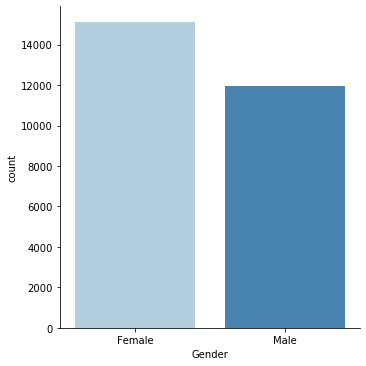

In [3]:
# create a nicer column for gender
df_sbs['Gender'] = df_sbs['A3'].apply(lambda x: 'Male' if x == 1 else 'Female')

# plot the gender distribution
sns.catplot(x="Gender", 
            kind="count", 
            data=df_sbs,
            palette=("Blues"))

Initially it appears that quite a bit of the female respondents hold an investment account

Text(0.5, 0.98, 'Do you hold an investment account?')

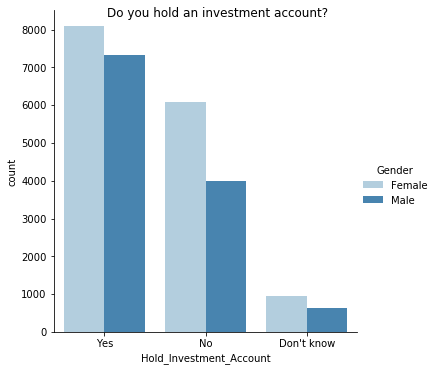

In [5]:
# who has access to an investment account

# create a clean column with labels
def investment_accounts(score):
    if score == 1:
        return 'Yes'
    elif score == 2:
        return 'No'
    else:
        return "Don't know"
        
df_sbs['Hold_Investment_Account'] = df_sbs.apply(lambda x: investment_accounts(x['C1_2012']),axis=1)

# plot the gender distribution
g3 = sns.catplot(x="Hold_Investment_Account", 
            kind="count",
            hue='Gender',
            data=df_sbs,
            order=["Yes", "No", "Don't know"],
            palette=("Blues"))
g3.fig.suptitle('Do you hold an investment account?') # can also get the figure from plt.gcf()

As a percentage of respondents about 0.535117 female respondents hold an account.   And about 0.612412 of males hold an account.

This difference becomes even more apparent when you look at how these investment accounts were aquired.   Only about 22% of the female survey respondents said that the retirement or investment accounts they had access to were their own.

In [6]:
df_sbs[(df_sbs['Gender'] =='Female')][['Gender','Account_Owner']].value_counts(normalize=True)

KeyError: "['Account_Owner'] not in index"

Text(0.5, 0.98, 'Discussing My Finances Makes Me Feel Stressed')

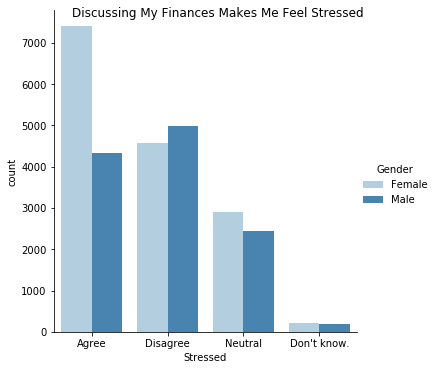

In [4]:

# create a clean column with labels
def financial_stress(score):
    if score <= 3:
        return 'Disagree'
    elif score == 4:
        return 'Neutral'
    elif score <= 7:
        return "Agree"
    else:
        return "Don't know."
        
df_sbs['Stressed'] = df_sbs.apply(lambda x: financial_stress(x['J33_41']),axis=1)

# plot the gender distribution
g2 = sns.catplot(x="Stressed", 
            kind="count",
            hue='Gender',
            data=df_sbs,
            palette=("Blues"))
g2.fig.suptitle('Discussing My Finances Makes Me Feel Stressed') # can also get the figure from plt.gcf()

41% of males report feeling stressed about discussing finances while 49% of females discuss feeling stressed.

## Discussion (including Limitations and Implications)

Summarize the findings, and what they mean (implications for business, design, further research, public policy, etc). An explicit “Discussion” “Conclusion” and “Limitations” section are great! But there are other ways to organize this information too. It just needs to be there in some form.

## Conclusion

## References